In [94]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
train = pd.read_csv("/kaggle/input/santandar-processed-data/fdata.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13618663 entries, 0 to 13618662
Data columns (total 43 columns):
 #   Column                                  Dtype  
---  ------                                  -----  
 0   data_date                               object 
 1   employee_index                          int64  
 2   country_residence                       int64  
 3   gender                                  int64  
 4   registration_date                       object 
 5   new_customer_index                      int64  
 6   seniority                               float64
 7   primary_customer                        float64
 8   customer_type_beginning_month           int64  
 9   customer_relation_type_beginning_month  object 
 10  residence_index                         object 
 11  foreigner_index                         object 
 12  channel_used                            object 
 13  province_code                           float64
 14  province_name                   

In [4]:
tdata=train

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 1. Convert date columns to seconds
train['data_date'] = pd.to_datetime(train['data_date']).astype(int) / 10**9
train['registration_date'] = pd.to_datetime(train['registration_date']).astype(int) / 10**9

# 2. Encode object columns to integer values using label encoder
encoder = LabelEncoder()
train['customer_relation_type_beginning_month'] = encoder.fit_transform(train['customer_relation_type_beginning_month'])
train['residence_index'] = encoder.fit_transform(train['residence_index'])
train['foreigner_index'] = encoder.fit_transform(train['foreigner_index'])
train['channel_used'] = encoder.fit_transform(train['channel_used'])
train['province_name'] = encoder.fit_transform(train['province_name'])
train['segmentation'] = encoder.fit_transform(train['segmentation'])


In [6]:
columns_to_remove = ['employee_index', 'country_residence', 'new_customer_index',
                     'primary_customer', 'customer_type_beginning_month',
                     'customer_relation_type_beginning_month', 'residence_index',
                     'foreigner_index', 'registration_date']


train.drop(columns=columns_to_remove, inplace=True)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13618663 entries, 0 to 13618662
Data columns (total 34 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   data_date                     float64
 1   gender                        int64  
 2   seniority                     float64
 3   channel_used                  int64  
 4   province_code                 float64
 5   province_name                 int64  
 6   activity_index                float64
 7   gross_income_household        float64
 8   segmentation                  int64  
 9   prod_savings_account          int64  
 10  prod_guarantees               int64  
 11  prod_current_accounts         int64  
 12  prod_derivative_account       int64  
 13  prod_payroll_account          int64  
 14  prod_junior_account           int64  
 15  prod_mas_particular_account   int64  
 16  prod_particular_account       int64  
 17  prod_particular_plus_account  int64  
 18  prod_short_term_depo

In [8]:
train.head()

,data_date,gender,seniority,channel_used,province_code,province_name,activity_index,gross_income_household,segmentation,prod_savings_account,...,prod_pensions1,prod_loans,prod_taxes,prod_credit_card,prod_securities,prod_home_account,prod_payroll,prod_pensions2,prod_direct_debit,age_group
0,1.422403e+09,0,6.0,153,29.0,31,1.0,87218.10,1,0,...,0,0,0,0,0,0,0.0,0.0,0,1
1,1.422403e+09,1,35.0,150,13.0,16,0.0,35548.74,0,0,...,0,0,0,0,0,0,0.0,0.0,0,1
2,1.422403e+09,1,35.0,150,13.0,16,0.0,122179.11,0,0,...,0,0,0,0,0,0,0.0,0.0,0,1
3,1.422403e+09,0,35.0,149,50.0,51,0.0,119775.54,0,0,...,0,0,0,0,0,0,0.0,0.0,0,1
4,1.422403e+09,1,35.0,150,50.0,51,1.0,101850.00,0,0,...,0,0,0,0,0,0,0.0,0.0,0,1


In [9]:
train.iloc[0]

data_date                       1.422403e+09
gender                          0.000000e+00
seniority                       6.000000e+00
channel_used                    1.530000e+02
province_code                   2.900000e+01
province_name                   3.100000e+01
activity_index                  1.000000e+00
gross_income_household          8.721810e+04
segmentation                    1.000000e+00
prod_savings_account            0.000000e+00
prod_guarantees                 0.000000e+00
prod_current_accounts           1.000000e+00
prod_derivative_account         0.000000e+00
prod_payroll_account            0.000000e+00
prod_junior_account             0.000000e+00
prod_mas_particular_account     0.000000e+00
prod_particular_account         0.000000e+00
prod_particular_plus_account    0.000000e+00
prod_short_term_deposits        0.000000e+00
prod_medium_term_deposits       0.000000e+00
prod_long_term_deposits         0.000000e+00
prod_e_account                  0.000000e+00
prod_funds

In [10]:
for col in train.columns.tolist():
    print(f"Unique values in {col}: {train[col].unique()}")

Unique values in data_date: [1.4224032e+09 1.4250816e+09 1.4275008e+09 1.4301792e+09 1.4327712e+09
 1.4354496e+09 1.4380416e+09 1.4407200e+09 1.4433984e+09 1.4459904e+09
 1.4486688e+09 1.4512608e+09 1.4539392e+09 1.4566176e+09 1.4591232e+09
 1.4618016e+09 1.4643936e+09]
Unique values in gender: [0 1]
Unique values in seniority: [  6.  35.  34.  33.  31.  21.  16.  27.   9.  22.  13.  29.   8.  11.
  10.  28.  24.   7.  25.  14.  26.  12.  23.   1.  18.   4.   3.  17.
  32.  30.  20.  15.  19. 157.  36.   5.  40.  38.  37.  39.   0.   2.
  47.  44.  42.  46.  45.  43.  41.  57.  48.  52.  49.  50.  56.  58.
  51.  55.  54.  53.  59.  62.  61.  60.  63. 139. 165. 118. 164. 142.
  94. 159. 143. 105. 151. 162. 137. 150. 128. 122. 156. 119. 160.  79.
  95. 132. 161.  98. 127.  72. 155. 108. 163. 102. 148. 115. 146. 107.
  81. 216. 135.  92. 121. 198. 134.  93. 140. 110. 120. 147. 116.  64.
  77.  85.  99.  78. 100. 113. 154. 166. 133. 124. 141.  66. 117.  86.
 193.  80. 144.  87. 126. 158. 

In [11]:
data_without_missing = train.dropna()

In [27]:
data_without_missing.isnull().sum()

data_date                       0
gender                          0
seniority                       0
channel_used                    0
province_code                   0
province_name                   0
activity_index                  0
gross_income_household          0
segmentation                    0
prod_savings_account            0
prod_guarantees                 0
prod_current_accounts           0
prod_derivative_account         0
prod_payroll_account            0
prod_junior_account             0
prod_mas_particular_account     0
prod_particular_account         0
prod_particular_plus_account    0
prod_short_term_deposits        0
prod_medium_term_deposits       0
prod_long_term_deposits         0
prod_e_account                  0
prod_funds                      0
prod_mortgage                   0
prod_pensions1                  0
prod_loans                      0
prod_taxes                      0
prod_credit_card                0
prod_securities                 0
prod_home_acco

In [13]:
product_list = [
     'prod_savings_account',
#     'prod_guarantees',
#     'prod_current_accounts',
#     'prod_derivative_account',
#     'prod_payroll_account',
#     'prod_junior_account',
#     'prod_mas_particular_account',
#     'prod_particular_account',
#     'prod_particular_plus_account',
#     'prod_short_term_deposits',
#     'prod_medium_term_deposits',
#     'prod_long_term_deposits',
#     'prod_e_account',
#     'prod_funds',
#     'prod_mortgage',
#     'prod_pensions1',
#     'prod_loans',
#     'prod_taxes',
#     'prod_credit_card',
#     'prod_securities',
#     'prod_home_account',
#     'prod_payroll',
#     'prod_pensions2',
#     'prod_direct_debit'
]

In [14]:
len(product_list)

1

In [15]:
from tqdm import tqdm
from sklearn.model_selection import train_test_split

In [16]:
data_without_missing.columns

Index(['data_date', 'gender', 'seniority', 'channel_used', 'province_code',
       'province_name', 'activity_index', 'gross_income_household',
       'segmentation', 'prod_savings_account', 'prod_guarantees',
       'prod_current_accounts', 'prod_derivative_account',
       'prod_payroll_account', 'prod_junior_account',
       'prod_mas_particular_account', 'prod_particular_account',
       'prod_particular_plus_account', 'prod_short_term_deposits',
       'prod_medium_term_deposits', 'prod_long_term_deposits',
       'prod_e_account', 'prod_funds', 'prod_mortgage', 'prod_pensions1',
       'prod_loans', 'prod_taxes', 'prod_credit_card', 'prod_securities',
       'prod_home_account', 'prod_payroll', 'prod_pensions2',
       'prod_direct_debit', 'age_group'],
      dtype='object')

In [17]:
from sklearn.model_selection import train_test_split

# Selecting columns for X
X_cols = ['data_date', 'gender', 'seniority', 'channel_used', 'province_code',
       'province_name', 'activity_index', 'gross_income_household',
       'segmentation', 'age_group']

# Selecting columns for y
y_cols = ['prod_savings_account', 'prod_guarantees', 'prod_current_accounts',
          'prod_derivative_account', 'prod_payroll_account',
          'prod_junior_account', 'prod_mas_particular_account',
          'prod_particular_account', 'prod_particular_plus_account',
          'prod_short_term_deposits', 'prod_medium_term_deposits',
          'prod_long_term_deposits', 'prod_e_account', 'prod_funds',
          'prod_mortgage', 'prod_pensions1', 'prod_loans', 'prod_taxes',
          'prod_credit_card', 'prod_securities', 'prod_home_account',
          'prod_payroll', 'prod_pensions2', 'prod_direct_debit']

# Creating X and y
X = data_without_missing.loc[:, X_cols][:1000000]
y = data_without_missing.loc[:, y_cols][:1000000]

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


In [18]:
X_test.head()

,data_date,gender,seniority,channel_used,province_code,province_name,activity_index,gross_income_household,segmentation,age_group
373342,1.422403e+09,0,134.0,24,28.0,30,0.0,101850.00,1,2
459317,1.422403e+09,0,185.0,24,37.0,40,1.0,15039.66,1,3
262416,1.422403e+09,0,23.0,24,31.0,34,0.0,101850.00,0,1
789480,1.425082e+09,1,193.0,24,18.0,22,0.0,101850.00,1,4
383256,1.422403e+09,0,160.0,122,38.0,41,1.0,64841.34,1,2


In [19]:
X_test.shape

(200000, 10)

In [20]:
X_test.head(1)
first_row = X_test.loc[373342]

In [21]:
first_row

data_date                 1.422403e+09
gender                    0.000000e+00
seniority                 1.340000e+02
channel_used              2.400000e+01
province_code             2.800000e+01
province_name             3.000000e+01
activity_index            0.000000e+00
gross_income_household    1.018500e+05
segmentation              1.000000e+00
age_group                 2.000000e+00
Name: 373342, dtype: float64

In [22]:
X_train.shape

(800000, 10)

In [23]:
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Concatenate, Embedding, Flatten, MultiHeadAttention, LayerNormalization,Dropout
from tensorflow.keras.models import Model

2024-06-20 05:22:57.934999: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-20 05:22:57.935104: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-20 05:22:58.051796: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [24]:
pred = {}

In [25]:
input_layer = Input(shape=(10,), name='input_layer')

# Add dense layers with dropout
dense_1 = Dense(64, activation='relu')(input_layer)
dropout_1 = Dropout(0.1)(dense_1)
dense_2 = Dense(32, activation='relu')(dropout_1)
dropout_2 = Dropout(0.1)(dense_2)
dense_3 = Dense(16, activation='relu')(dropout_2)
dropout_3 = Dropout(0.1)(dense_3)

# Output layer
output_layer = Dense(1, activation='sigmoid')(dropout_3)

# Define model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [26]:
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
product_list = [
    'prod_savings_account',
    'prod_guarantees',
    'prod_current_accounts',
    'prod_derivative_account',
    'prod_payroll_account',
    'prod_junior_account',
    'prod_mas_particular_account',
    'prod_particular_account',
    'prod_particular_plus_account',
    'prod_short_term_deposits',
    'prod_medium_term_deposits',
    'prod_long_term_deposits',
    'prod_e_account',
    'prod_funds',
    'prod_mortgage',
    'prod_pensions1',
    'prod_loans',
    'prod_taxes',
    'prod_credit_card',
    'prod_securities',
    'prod_home_account',
    'prod_payroll',
    'prod_pensions2',
    'prod_direct_debit'
]

In [29]:
for col in product_list:
    print(col)

prod_savings_account
prod_guarantees
prod_current_accounts
prod_derivative_account
prod_payroll_account
prod_junior_account
prod_mas_particular_account
prod_particular_account
prod_particular_plus_account
prod_short_term_deposits
prod_medium_term_deposits
prod_long_term_deposits
prod_e_account
prod_funds
prod_mortgage
prod_pensions1
prod_loans
prod_taxes
prod_credit_card
prod_securities
prod_home_account
prod_payroll
prod_pensions2
prod_direct_debit


In [30]:
for col in product_list:
    print(col)
    if  train[col].nunique() == 2:
        y = y_test[col]
        model.fit(X_train, y_train[col], epochs=1, batch_size=32, validation_split=0.2)
        xgb_probabilities = model.predict(X_test)
        pred[col] = xgb_probabilities 
        model.save_weights(f'model_{col}.weights.h5')

prod_savings_account
   85/20000 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - accuracy: 0.9977 - loss: 51458.0078 

I0000 00:00:1718861478.492950     106 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


20000/20000 ━━━━━━━━━━━━━━━━━━━━ 48s 2ms/step - accuracy: 0.9995 - loss: 14021.9463 - val_accuracy: 0.9998 - val_loss: 0.0022
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
prod_guarantees
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step - accuracy: 0.9999 - loss: 15.9171 - val_accuracy: 1.0000 - val_loss: 3.0742e-04
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
prod_current_accounts
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 0.3393 - loss: 51.0530 - val_accuracy: 0.7570 - val_loss: 0.5546
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
prod_derivative_account
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 0.8841 - loss: 0.2459 - val_accuracy: 0.9994 - val_loss: 0.0053
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
prod_payroll_account
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 0.8945 - loss: 1.7285 - val_accuracy: 0.8955 - val_loss: 0.3349
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
prod_junior_account
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.98

# Predictions 

In [31]:
import numpy as np

# Example dictionary
datad = {
    'prod_guarantees': np.array([[1.4795244e-05],
                                 [1.5492973e-05],
                                 [2.2213326e-05],
                                 [2.3030307e-05],
                                 [1.4767839e-05],
                                 [1.4860431e-05]])
}

# Remove outer array brackets and flatten the arrays
for key in datad:
    datad[key] = datad[key].flatten()

# Print the modified dictionary
print(datad)


{'prod_guarantees': array([1.4795244e-05, 1.5492973e-05, 2.2213326e-05, 2.3030307e-05,
       1.4767839e-05, 1.4860431e-05])}


In [32]:
for key in pred:
    pred[key] = pred[key].flatten()

In [33]:
pred

{'prod_savings_account': array([0.00071784, 0.00071784, 0.00071784, ..., 0.00071784, 0.00071784,
        0.00071784], dtype=float32),
 'prod_guarantees': array([6.725559e-05, 6.725559e-05, 6.725559e-05, ..., 6.725559e-05,
        6.725559e-05, 6.725559e-05], dtype=float32),
 'prod_current_accounts': array([0.75175583, 0.75175583, 0.75175583, ..., 0.75175583, 0.75175583,
        0.75175583], dtype=float32),
 'prod_derivative_account': array([0.00085202, 0.00085202, 0.00085202, ..., 0.00085202, 0.00085202,
        0.00085202], dtype=float32),
 'prod_payroll_account': array([0.10399908, 0.10399908, 0.10399908, ..., 0.10399908, 0.10399908,
        0.10399908], dtype=float32),
 'prod_junior_account': array([0.01385194, 0.01385194, 0.01385194, ..., 0.01385194, 0.01385194,
        0.01385194], dtype=float32),
 'prod_mas_particular_account': array([0.00980299, 0.00980299, 0.00980299, ..., 0.00980299, 0.00980299,
        0.00980299], dtype=float32),
 'prod_particular_account': array([0.21262076

In [34]:
pred_df = pd.DataFrame(pred)

data_subset = X_test

concatenated_data = pd.concat([data_subset.reset_index(drop=True), pred_df], axis=1)

In [35]:
pred_df.head()

,prod_savings_account,prod_guarantees,prod_current_accounts,prod_derivative_account,prod_payroll_account,prod_junior_account,prod_mas_particular_account,prod_particular_account,prod_particular_plus_account,prod_short_term_deposits,...,prod_mortgage,prod_pensions1,prod_loans,prod_taxes,prod_credit_card,prod_securities,prod_home_account,prod_payroll,prod_pensions2,prod_direct_debit
0,0.000718,0.000067,0.751756,0.000852,0.103999,0.013852,0.009803,0.212621,0.072581,0.002021,...,0.009559,0.014608,0.004068,0.070396,0.067111,0.039369,0.006578,0.068316,0.080969,0.165756
1,0.000718,0.000067,0.751756,0.000852,0.103999,0.013852,0.009803,0.212621,0.072581,0.002021,...,0.009559,0.014608,0.004068,0.070396,0.067111,0.039369,0.006578,0.068316,0.080969,0.165756
2,0.000718,0.000067,0.751756,0.000852,0.103999,0.013852,0.009803,0.212621,0.072581,0.002021,...,0.009559,0.014608,0.004068,0.070396,0.067111,0.039369,0.006578,0.068316,0.080969,0.165756
3,0.000718,0.000067,0.751756,0.000852,0.103999,0.013852,0.009803,0.212621,0.072581,0.002021,...,0.009559,0.014608,0.004068,0.070396,0.067111,0.039369,0.006578,0.068316,0.080969,0.165756
4,0.000718,0.000067,0.751756,0.000852,0.103999,0.013852,0.009803,0.212621,0.072581,0.002021,...,0.009559,0.014608,0.004068,0.070396,0.067111,0.039369,0.006578,0.068316,0.080969,0.165756


In [36]:
X

,data_date,gender,seniority,channel_used,province_code,province_name,activity_index,gross_income_household,segmentation,age_group
0,1.422403e+09,0,6.0,153,29.0,31,1.0,87218.10,1,1
1,1.422403e+09,1,35.0,150,13.0,16,0.0,35548.74,0,1
2,1.422403e+09,1,35.0,150,13.0,16,0.0,122179.11,0,1
3,1.422403e+09,0,35.0,149,50.0,51,0.0,119775.54,0,1
4,1.422403e+09,1,35.0,150,50.0,51,1.0,101850.00,0,1
...,...,...,...,...,...,...,...,...,...,...
1000095,1.425082e+09,0,22.0,150,46.0,48,0.0,53533.26,0,1
1000096,1.425082e+09,0,22.0,150,46.0,48,0.0,143406.03,0,1
1000097,1.425082e+09,0,22.0,150,46.0,48,0.0,101850.00,0,1
1000098,1.425082e+09,0,22.0,150,12.0,14,0.0,70956.93,0,1


In [67]:
import os
import tensorflow as tf

# Directory containing the models
model_dir = '/kaggle/working/'

# List all files in the directory
model_files = os.listdir(model_dir)

# Create an empty list to store predictions
all_predictions = []

# Loop through each model file
for model_file in model_files:
    # Construct the path to the model file
    if ".h5" not in model_file:
        continue
    model_path = os.path.join(model_dir, model_file)
    
    # Load the model architecture
#     model = YourModelArchitecture()  # Replace YourModelArchitecture with your model architecture
    
    # Load the weights
    model.load_weights(model_path)
    
    # Assuming you have data for prediction
    # X_test = your_test_data
    
    X_test_df = pd.DataFrame(X_test)
    
    # Make predictions
#     predictions = model.predict(X_test_df.iloc[1:2])

    predictions = model.predict(X_test.loc[884395].to_frame().transpose())
    
    # Append predictions to the list
    all_predictions.append(predictions)

    # Extract probability values from the numpy arrays and create a list
    probability_values_list = [pred[0][0] for pred in all_predictions]

# Print the list of probability values
print(probability_values_list)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[0.1657556, 0.039369363, 0.006577908, 0.08096862, 0.026841167, 0.07258123, 0.0007178437,

In [68]:
import numpy as np

# Extract values from NumPy arrays and store in a list
values_list = [arr.item() for arr in probability_values_list]

print(values_list)

[0.16575559973716736, 0.0393693633377552, 0.006577908061444759, 0.08096861839294434, 0.026841167360544205, 0.0725812315940857, 0.0007178437081165612, 0.013851938769221306, 0.7517558336257935, 0.0008520205155946314, 0.0683162733912468, 0.07039608061313629, 0.10622385144233704, 0.009558740071952343, 0.21262076497077942, 0.014607829041779041, 6.725559069309384e-05, 0.06711113452911377, 0.06830504536628723, 0.1039990782737732, 0.00202146521769464, 0.003275031689554453, 0.009802987799048424, 0.004067704547196627]


In [69]:
product_list = [
    'prod_junior_account',
    'prod_securities',
    'prod_guarantees',
    'prod_medium_term_deposits',
    'prod_home_account',
    'prod_taxes',
    'prod_current_accounts',
    'prod_savings_account',
    'prod_payroll_account',
    'prod_loans',
    'prod_pensions1',
    'prod_payroll',
    'prod_short_term_deposits',
    'prod_e_account',
    'prod_credit_card',
    'prod_direct_debit',
    'prod_funds',
    'prod_particular_plus_account',
    'prod_mas_particular_account',
    'prod_particular_account',
    'prod_derivative_account',
    'prod_pensions2',
    'prod_mortgage',
    'prod_long_term_deposits'
]

In [70]:
probability_dict = dict(zip(product_list, values_list))

for key, val in probability_dict.items():
    print(f"{key}: {val}")

prod_junior_account: 0.16575559973716736
prod_securities: 0.0393693633377552
prod_guarantees: 0.006577908061444759
prod_medium_term_deposits: 0.08096861839294434
prod_home_account: 0.026841167360544205
prod_taxes: 0.0725812315940857
prod_current_accounts: 0.0007178437081165612
prod_savings_account: 0.013851938769221306
prod_payroll_account: 0.7517558336257935
prod_loans: 0.0008520205155946314
prod_pensions1: 0.0683162733912468
prod_payroll: 0.07039608061313629
prod_short_term_deposits: 0.10622385144233704
prod_e_account: 0.009558740071952343
prod_credit_card: 0.21262076497077942
prod_direct_debit: 0.014607829041779041
prod_funds: 6.725559069309384e-05
prod_particular_plus_account: 0.06711113452911377
prod_mas_particular_account: 0.06830504536628723
prod_particular_account: 0.1039990782737732
prod_derivative_account: 0.00202146521769464
prod_pensions2: 0.003275031689554453
prod_mortgage: 0.009802987799048424
prod_long_term_deposits: 0.004067704547196627


# 2nd user

In [71]:
# Sort the dictionary by values
sorted_probability_dict = dict(sorted(probability_dict.items(), key=lambda item: item[1], reverse=True))

# Print the sorted dictionary
i = 1
for key, val in sorted_probability_dict.items():
    print(f"{i} {key}: {val}")
    i += 1

1 prod_payroll_account: 0.7517558336257935
2 prod_credit_card: 0.21262076497077942
3 prod_junior_account: 0.16575559973716736
4 prod_short_term_deposits: 0.10622385144233704
5 prod_particular_account: 0.1039990782737732
6 prod_medium_term_deposits: 0.08096861839294434
7 prod_taxes: 0.0725812315940857
8 prod_payroll: 0.07039608061313629
9 prod_pensions1: 0.0683162733912468
10 prod_mas_particular_account: 0.06830504536628723
11 prod_particular_plus_account: 0.06711113452911377
12 prod_securities: 0.0393693633377552
13 prod_home_account: 0.026841167360544205
14 prod_direct_debit: 0.014607829041779041
15 prod_savings_account: 0.013851938769221306
16 prod_mortgage: 0.009802987799048424
17 prod_e_account: 0.009558740071952343
18 prod_guarantees: 0.006577908061444759
19 prod_long_term_deposits: 0.004067704547196627
20 prod_pensions2: 0.003275031689554453
21 prod_derivative_account: 0.00202146521769464
22 prod_loans: 0.0008520205155946314
23 prod_current_accounts: 0.0007178437081165612
24 prod

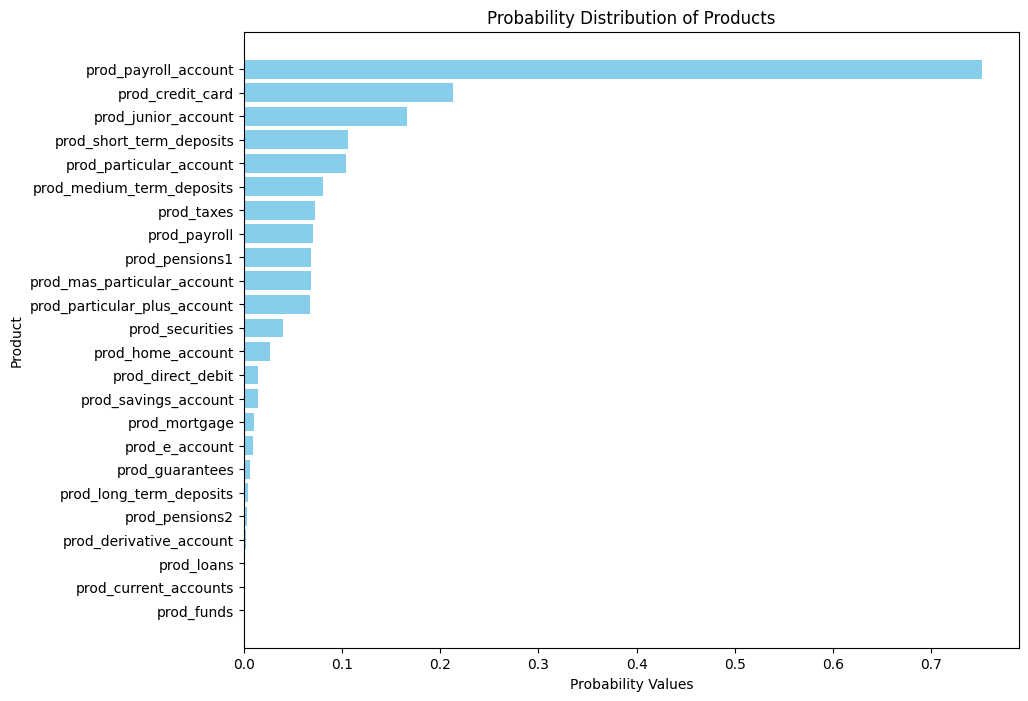

In [72]:
import matplotlib.pyplot as plt

# Convert the sorted dictionary to lists for plotting
keys = list(sorted_probability_dict.keys())
values = list(sorted_probability_dict.values())

# Plotting the bar chart
plt.figure(figsize=(10, 8))
plt.barh(keys, values, color='skyblue')
plt.xlabel('Probability Values')
plt.ylabel('Product')
plt.title('Probability Distribution of Products')
plt.gca().invert_yaxis()  # Invert y-axis to show highest probability at the top
plt.show()

In [73]:
X_test.loc[884395].to_frame().transpose()

,data_date,gender,seniority,channel_used,province_code,province_name,activity_index,gross_income_household,segmentation,age_group
884395,1.425082e+09,1.0,154.0,122.0,28.0,30.0,1.0,442014.42,1.0,3.0


In [74]:
# Filter rows where age_group column is 0
age_group_zero_rows = X_test[X_test['age_group'] == 0]

# Print the index of any row with age_group column as 0
if not age_group_zero_rows.empty:
    print("Index of row(s) with age_group column as 0:")
    print(age_group_zero_rows.index)
else:
    print("No rows found with age_group column as 0.")

Index of row(s) with age_group column as 0:
Index([257304, 469070, 630825, 552766, 193747, 760631, 111641, 545313, 737757,
       634898,
       ...
       750105, 365579, 706195,   3782, 769251, 618317, 528112, 854486, 349805,
       770134],
      dtype='int64', length=2547)


In [75]:
# Filter rows where age_group column is 0
age_group_zero_rows = X_test[X_test['age_group'] == 2]

# Print the index of any row with age_group column as 0
if not age_group_zero_rows.empty:
    print("Index of row(s) with age_group column as 0:")
    print(age_group_zero_rows.index)
else:
    print("No rows found with age_group column as 0.")

Index of row(s) with age_group column as 0:
Index([373342, 383256, 434709, 580742, 420499, 549458, 558070, 589992, 376756,
       404559,
       ...
       694322, 624363, 499405, 672341, 957332, 873766, 647437, 197193, 823350,
       533493],
      dtype='int64', length=83799)


In [76]:
# Filter rows where age_group column is 0
age_group_zero_rows = X_test[X_test['gross_income_household'] >= 400000]

# Print the index of any row with age_group column as 0
if not age_group_zero_rows.empty:
    print("Index of row(s) with age_group column as 0:")
    print(age_group_zero_rows.index)
else:
    print("No rows found with age_group column as 0.")

Index of row(s) with age_group column as 0:
Index([ 29411, 507314, 884395, 278966, 311348, 420770, 928317, 453653, 917179,
       246501,
       ...
       829631, 338620, 834063, 381515, 796779, 310290, 773048, 841915, 875640,
       658225],
      dtype='int64', length=4550)


In [77]:
X_test.segmentation.value_counts()

segmentation
1    131818
0     56649
2     11533
Name: count, dtype: int64

In [78]:
# Filter rows where age_group column is 0
age_group_zero_rows = X_test[X_test['segmentation'] == 2]

# Print the index of any row with age_group column as 0
if not age_group_zero_rows.empty:
    print("Index of row(s) with age_group column as 0:")
    print(age_group_zero_rows.index)
else:
    print("No rows found with age_group column as 0.")

Index of row(s) with age_group column as 0:
Index([641702, 419345, 393553, 797555, 835408, 926659, 409756, 704639, 322695,
       965800,
       ...
       639412, 726397, 795310, 458348, 573162, 482178, 876453, 506151,   1159,
       857112],
      dtype='int64', length=11533)


# Thompson Sampling

In [79]:
oracle_probabilities, product_list = list(sorted_probability_dict.values()), list(sorted_probability_dict.keys())
for i in range(len(oracle_probabilities)):
    print(f"{i}. {product_list[i]} : {oracle_probabilities[i]}")

0. prod_payroll_account : 0.7517558336257935
1. prod_credit_card : 0.21262076497077942
2. prod_junior_account : 0.16575559973716736
3. prod_short_term_deposits : 0.10622385144233704
4. prod_particular_account : 0.1039990782737732
5. prod_medium_term_deposits : 0.08096861839294434
6. prod_taxes : 0.0725812315940857
7. prod_payroll : 0.07039608061313629
8. prod_pensions1 : 0.0683162733912468
9. prod_mas_particular_account : 0.06830504536628723
10. prod_particular_plus_account : 0.06711113452911377
11. prod_securities : 0.0393693633377552
12. prod_home_account : 0.026841167360544205
13. prod_direct_debit : 0.014607829041779041
14. prod_savings_account : 0.013851938769221306
15. prod_mortgage : 0.009802987799048424
16. prod_e_account : 0.009558740071952343
17. prod_guarantees : 0.006577908061444759
18. prod_long_term_deposits : 0.004067704547196627
19. prod_pensions2 : 0.003275031689554453
20. prod_derivative_account : 0.00202146521769464
21. prod_loans : 0.0008520205155946314
22. prod_cur

In [80]:
import numpy as np
from collections import defaultdict

def thompson_sampling_with_scores(oracle_probabilities, num_users, product_list, initial_alpha=2, initial_beta=3):
    num_products = len(product_list)
    # Initialize parameters (alpha and beta) for Thompson Sampling
    alpha = np.full(num_products, initial_alpha)  # Initialize alpha values
    beta = np.full(num_products, initial_beta)    # Initialize beta values
    
    recommendations = []

    for _ in range(num_users):
        highest_p = -1
        recommended_product = None
        
        # Sampling and Selecting
        for j in range(num_products):
            p = np.random.beta(alpha[j], beta[j])  # Sample probability of success for each product
            if p > highest_p:
                highest_p = p
                recommended_product = j  # Select the product with the highest sampled probability
        
        recommendation_score = highest_p
        recommendations.append((recommended_product, recommendation_score))
        
        # Update parameters based on user feedback
        try:
            user_acceptance = np.random.choice([0, 1], p=[1 - oracle_probabilities[recommended_product], oracle_probabilities[recommended_product]])
        except IndexError:
            print(f"IndexError: product index {recommended_product} is out of range")
            continue
        
        if user_acceptance == 1:
            alpha[recommended_product] += 1  # Increase alpha for successful recommendation
        else:
            beta[recommended_product] += 1   # Increase beta for unsuccessful recommendation
    
    return recommendations

# Example usage with different initial alpha and beta values
num_users = 1000  # Number of users

# oracle_probabilities, product_list = list(sorted_probability_dict.values()), list(sorted_probability_dict.keys())
# Change the initial alpha and beta values as needed
recommendations_with_scores = thompson_sampling_with_scores(oracle_probabilities, num_users, product_list, initial_alpha=2, initial_beta=1)

# Further processing...
# Accumulate recommendation scores for each product
product_scores = defaultdict(float)
product_selections = defaultdict(int)
for product, score in recommendations_with_scores:
    product_scores[product] += score
    product_selections[product] += 1

# Sort products by their total recommendation scores
top_products = sorted(product_scores.items(), key=lambda x: x[1], reverse=True)[0:]

# Calculate selection percentage for each top product
total_users = num_users
top_products_with_percentage = [(product_list[product], score, product_selections[product] / total_users * 100) for product, score in top_products]

# Print the top 5 recommended products along with their total scores and selection percentage
print("Recommended Products:")
i = 1
for product_name, score, percentage in top_products_with_percentage:
    print(f"{i}. {product_name}: Total Score {score:.4f}, Selection Percentage {percentage:.2f}%")
    i += 1

Recommended Products:
1. prod_payroll_account: Total Score 663.2956, Selection Percentage 86.70%
2. prod_mas_particular_account: Total Score 8.0937, Selection Percentage 1.00%
3. prod_credit_card: Total Score 6.9590, Selection Percentage 0.90%
4. prod_taxes: Total Score 5.9113, Selection Percentage 0.70%
5. prod_particular_account: Total Score 5.8762, Selection Percentage 0.70%
6. prod_loans: Total Score 5.3196, Selection Percentage 0.60%
7. prod_funds: Total Score 5.0123, Selection Percentage 0.60%
8. prod_long_term_deposits: Total Score 4.9536, Selection Percentage 0.60%
9. prod_derivative_account: Total Score 4.8969, Selection Percentage 0.60%
10. prod_junior_account: Total Score 4.8806, Selection Percentage 0.60%
11. prod_particular_plus_account: Total Score 4.8568, Selection Percentage 0.60%
12. prod_direct_debit: Total Score 4.4065, Selection Percentage 0.50%
13. prod_guarantees: Total Score 4.3771, Selection Percentage 0.50%
14. prod_home_account: Total Score 4.2483, Selection P

# UCB

In [81]:
oracle_probability = oracle_probabilities

In [82]:
len(oracle_probability)

24

In [83]:
import numpy as np
from tqdm import tqdm

alpha = [0, 0.1, 0.5, 1, 1.5, 2, 4, 5, 10]
results = np.zeros((len(alpha), 24))
percentage_of_best = []
percentage_of_worst = []
percentage_of_second_best = []
budget = 1000
number_of_restraunts = 24
epsilon = alpha
best_restraunt = np.argmax(oracle_probability)
worst_restraunt = np.argmin(oracle_probability)
second_best_restraunt = oracle_probability.index(sorted(oracle_probability)[-2])

for i in tqdm(range(len(alpha)), desc="Alpha Loop"):
    restraunts_visited = []
    for j in tqdm(range(budget), desc="Budget Loop"):
        # Restraunt Selection by UCB
        best_ucb_score = -1 * np.inf
        for k in range(number_of_restraunts):
            ucb_score = results[i, k] + alpha[i] * np.sqrt((np.log(budget) / (restraunts_visited.count(k) + 1)))
            if ucb_score > best_ucb_score:
                best_ucb_score = ucb_score
                restraunt = k

        restraunts_visited.append(restraunt)
        did_you_like = np.random.choice([0, 1], p=[1 - oracle_probability[restraunt], oracle_probability[restraunt]])
        results[i, restraunt] = (1 - 1 / (restraunts_visited.count(restraunt))) * results[i, restraunt] + (
                    1 / ((restraunts_visited.count(restraunt)))) * did_you_like

    percentage_of_best.append((restraunts_visited.count(best_restraunt) / budget))
    percentage_of_worst.append((restraunts_visited.count(worst_restraunt) / budget))
    percentage_of_second_best.append((restraunts_visited.count(second_best_restraunt) / budget))

# Reset results and lists
results = np.zeros((len(alpha), 24))
percentage_of_best = []
percentage_of_worst = []

for i in tqdm(range(len(alpha)), desc="Alpha Loop"):
    restraunts_visited = []
    for j in tqdm(range(budget), desc="Budget Loop"):
        # Restraunt Selection by UCB
        best_ucb_score = -1 * np.inf
        for k in range(24):
            ucb_score = results[i, k] + alpha[i] * np.sqrt((np.log(budget) / (restraunts_visited.count(k) + 1)))
            if ucb_score > best_ucb_score:
                best_ucb_score = ucb_score
                restraunt = k

        restraunts_visited.append(restraunt)
        did_you_like = np.random.choice([0, 1], p=[1 - oracle_probability[restraunt], oracle_probability[restraunt]])
        results[i, restraunt] = (1 - 1 / (restraunts_visited.count(restraunt))) * results[i, restraunt] + (
                    1 / ((restraunts_visited.count(restraunt)))) * did_you_like

    percentage_of_best.append((restraunts_visited.count(best_restraunt) / budget))
    percentage_of_worst.append((restraunts_visited.count(worst_restraunt) / budget))
    percentage_of_second_best.append((restraunts_visited.count(second_best_restraunt) / budget))

Alpha Loop: 100%|██████████| 9/9 [00:03<00:00,  2.67it/s]


In [84]:
percentage_of_best, percentage_of_worst, percentage_of_second_best

([1.0, 1.0, 0.946, 0.729, 0.529, 0.343, 0.109, 0.088, 0.058],
 [0.0, 0.0, 0.002, 0.009, 0.018, 0.026, 0.036, 0.037, 0.04],
 [0.0,
  0.0,
  0.002,
  0.014,
  0.042,
  0.042,
  0.057,
  0.043,
  0.045,
  0.0,
  0.0,
  0.007,
  0.018,
  0.028,
  0.048,
  0.047,
  0.05,
  0.045])

# Epsion Greedy

In [85]:
epsilon = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

In [92]:
results = np.zeros((len(epsilon),number_of_restraunts))

percentage_of_best = []
percentage_of_worst = []
percentage_of_second_best = []

for i in range(len(epsilon)):
    restraunts_visited = []
    for j in range(budget):

        #Restraunt Selection by epsilon-greedy
        if np.random.random() < epsilon[i]:
            restraunt = np.random.choice(number_of_restraunts)
        else:
            restraunt = np.argmax(results[i])

        restraunts_visited.append(restraunt)
        did_you_like = np.random.choice([0,1],p = [1-oracle_probability[restraunt],oracle_probability[restraunt]])
        results[i,restraunt] = (1-1/(restraunts_visited.count(restraunt)))*results[i,restraunt] + (1/((restraunts_visited.count(restraunt))))*did_you_like

    percentage_of_best.append((restraunts_visited.count(best_restraunt)/budget))
    percentage_of_worst.append((restraunts_visited.count(worst_restraunt)/budget))
    percentage_of_second_best.append((restraunts_visited.count(second_best_restraunt)/budget))

In [93]:
percentage_of_best,percentage_of_worst,percentage_of_second_best

([1.0, 0.918, 0.811, 0.716, 0.606, 0.517, 0.441, 0.321, 0.183, 0.143],
 [0.0, 0.003, 0.003, 0.018, 0.017, 0.022, 0.03, 0.029, 0.033, 0.03],
 [0.0, 0.003, 0.007, 0.006, 0.018, 0.012, 0.021, 0.027, 0.065, 0.042])